# <span style='font-family:Georgia'> <span style='color:blue'> Deep Learning Tutorial Session - 4th April 2024

### Agenda -
- Dimensionality Reduction using Autoencoders.
- Comparison of Autoencoders with other Dimensionality Reduction Techniques.

---

#### Splitting the data into train and test.

In [ ]:
!pip install split-folders

In [ ]:
import os
import splitfolders
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

input_dir = os.path.join('/kaggle/input/medical-mnist')
output_dir = os.path.join('/kaggle/working/MedicalMNIST_splitted')

splitfolders.ratio(input_dir, output=output_dir, seed=1337, ratio=(.8, .2), group_prefix=None)

Copying files: 58954 files [10:53, 90.27 files/s] 


#### Preprocessing the data.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Specifiy the path to training and validation folder
train_dir = os.path.join('/kaggle/working/MedicalMNIST_splitted/train')
test_dir = os.path.join('/kaggle/working/MedicalMNIST_splitted/val')

# Apply image generator
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(44, 44),
                                                   batch_size= 47163,
                                                   class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_dir,target_size=(44, 44),
                                                   batch_size=11791,
                                                   class_mode='categorical')

# Fetch training and test data and their ground-trith label
x_train, y_train = next(train_generator)
x_test, y_test  = next(test_generator)

n_examples = 500
example_images = x_test[0:n_examples]
example_labels = y_test[0:n_examples]

labels = [np.where(i==1)[0][0] for i in example_labels]

2024-04-04 01:31:16.051259: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-04 01:31:16.051370: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-04 01:31:16.313296: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Found 47163 images belonging to 6 classes.
Found 11791 images belonging to 6 classes.


## <span style='font-family:Georgia'> <span style='color:green'> Implementing a Simple Autoencoder for dimensionality reduction and reconstruction of the image.

In [ ]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Dropout, Flatten, Dense, Reshape

encoded_dim = 2

encoder = Sequential([
    Conv2D(input_shape=(44,44,3), filters= 64, kernel_size = (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2), padding='same'),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D( (2, 2), padding='same'),
    Conv2D(16, (3, 3), activation='relu', padding='same'),
    Flatten(),
    Dense(encoded_dim)
])

pretrain_encodings = encoder(example_images).numpy()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [ ]:
decoder = Sequential ([
    Dense(1936, activation = 'relu', input_shape=(encoded_dim,)),
    Reshape((11,11,16)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    Conv2D(3, (3, 3), padding='same')
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
autoencoder_dr = Model(inputs = encoder.inputs, outputs = decoder(encoder.outputs))

autoencoder_dr.compile(loss = 'mse')

autoencoder_dr.fit(x_train, x_train, epochs = 10, verbose=1)

Epoch 1/10
  29/1474 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.1276  

I0000 00:00:1712194329.454278     105 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1712194329.474314     105 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update
W0000 00:00:1712194329.478014     105 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1474/1474 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - loss: 0.0380
Epoch 2/10
  20/1474 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0231 

W0000 00:00:1712194340.523644     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1474/1474 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0232
Epoch 3/10
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0220
Epoch 4/10
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0210
Epoch 5/10
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.0206
Epoch 6/10
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0202
Epoch 7/10
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0199
Epoch 8/10
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0194
Epoch 9/10
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0194
Epoch 10/10
1474/1474 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 0.0193


In [ ]:
class_names = ["ChestCT", "HeadCT", "BreastMRI", "AbdomenCT", "CXR", "Hand"]

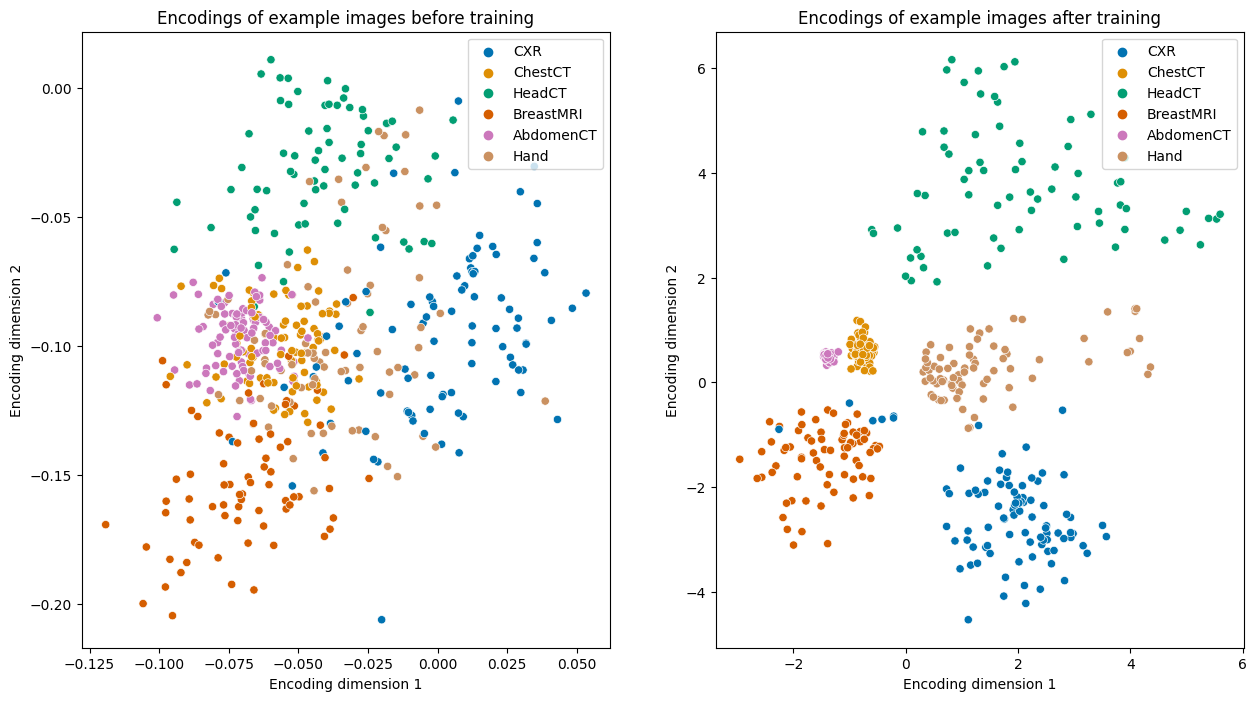

In [ ]:
# Convert posttrain_encodings to numpy array
posttrain_encodings = encoder(example_images).numpy()

f, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
sns.scatterplot(x=pretrain_encodings[:, 0],
                y=pretrain_encodings[:, 1],
                hue=[class_names[label] for label in labels], ax=axs[0],
                palette=sns.color_palette("colorblind", 6))
sns.scatterplot(x=posttrain_encodings[:, 0],
                y=posttrain_encodings[:, 1],
                hue=[class_names[label] for label in labels], ax=axs[1],
                palette=sns.color_palette("colorblind", 6))

axs[0].set_title('Encodings of example images before training')
axs[1].set_title('Encodings of example images after training')

for ax in axs:
    ax.set_xlabel('Encoding dimension 1')
    ax.set_ylabel('Encoding dimension 2')
    ax.legend(loc='upper right')

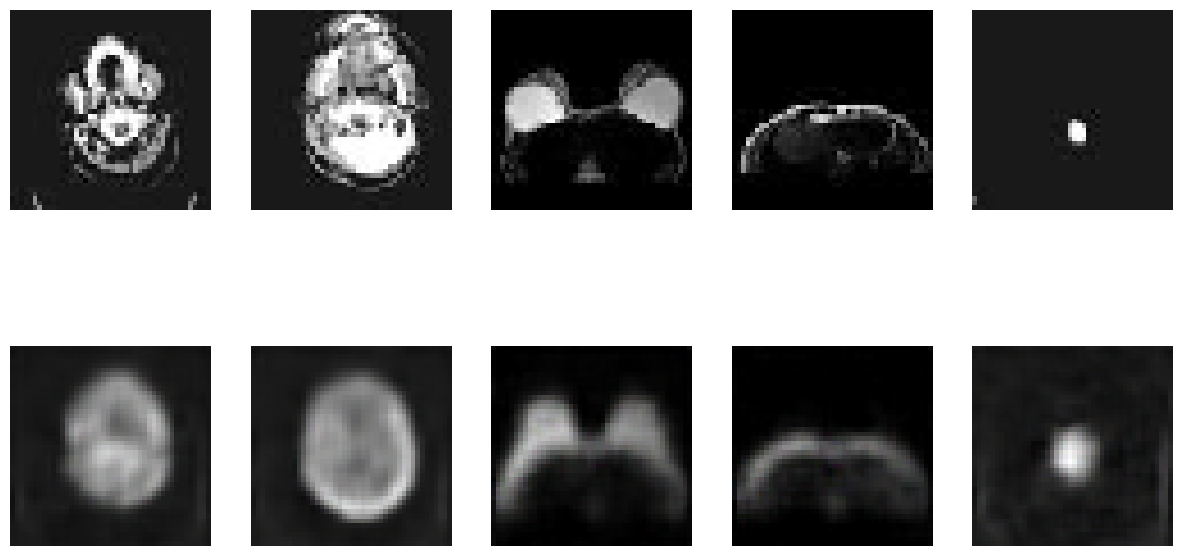

In [ ]:
reconstructed_img = autoencoder_dr(example_images)

f, axs = plt.subplots(2, 5, figsize=(15, 8))
for j in range(5):
    axs[0, j].imshow(example_images[j+20], cmap='binary')
    axs[1, j].imshow(reconstructed_img[j+20].numpy().squeeze(), cmap='binary')
    axs[0, j].axis('off')
    axs[1, j].axis('off')

---

## <span style='font-family:Georgia'> <span style='color:green'> Comparison of PCA and Autoencoders.

In [ ]:
import cv2
import pandas as pd
import numpy as np
from PIL import Image
import math
from sklearn.preprocessing import StandardScaler
from keras.layers import Input

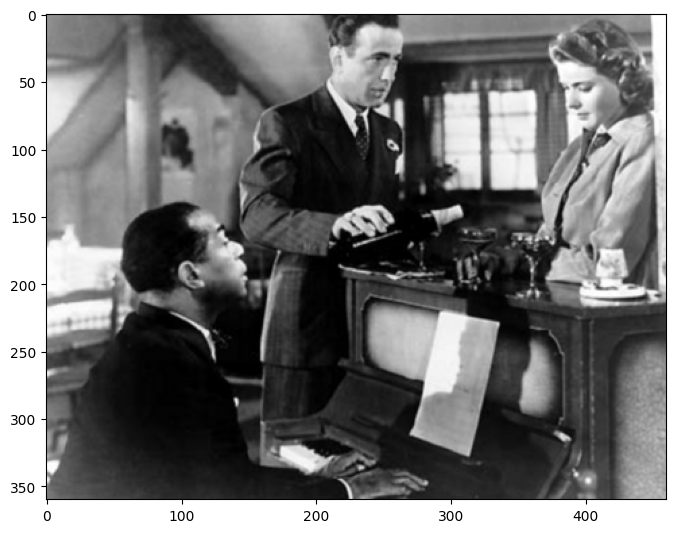

In [ ]:
image_matrix = cv2.imread("/kaggle/input/casablanca/casablanca.png",0)
plt.figure(figsize=(8,12))
plt.imshow(image_matrix,"gray")

In [ ]:
original_dimensions = image_matrix.shape
print(original_dimensions)

(360, 460)


In [ ]:
from sklearn.decomposition import PCA

pct_reduction = 0.10
reduced_pixel  = int( pct_reduction* original_dimensions[1])

#Applying PCA
pca = PCA(n_components=reduced_pixel)
pca.fit(image_matrix)

#Transforming the input matrix
X_transformed = pca.transform(image_matrix)
print("Original Input dimesnions {}".format(original_dimensions))
print("New Reduced dimensions {}".format(X_transformed.shape))

Original Input dimesnions (360, 460)
New Reduced dimensions (360, 46)


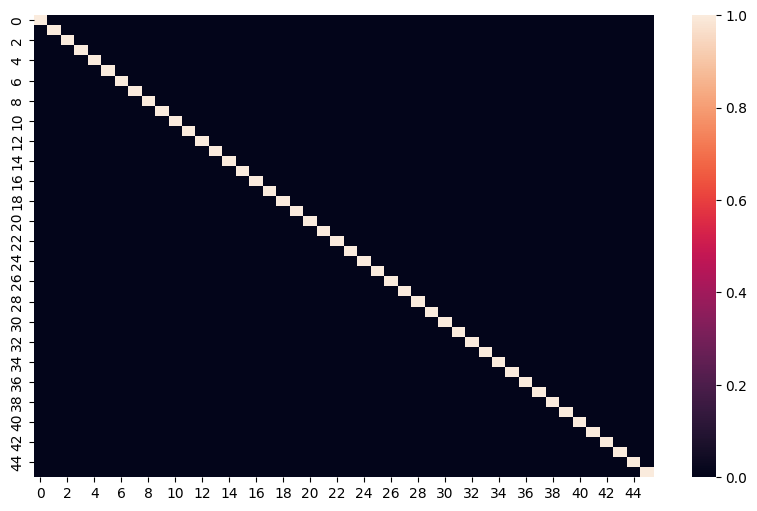

In [ ]:
df_pca = pd.DataFrame(data = X_transformed,columns=list(range(X_transformed.shape[1])))
figure = plt.figure(figsize=(10,6))
corrMatrix = df_pca.corr()
sns.heatmap(corrMatrix, annot=False)
plt.show()

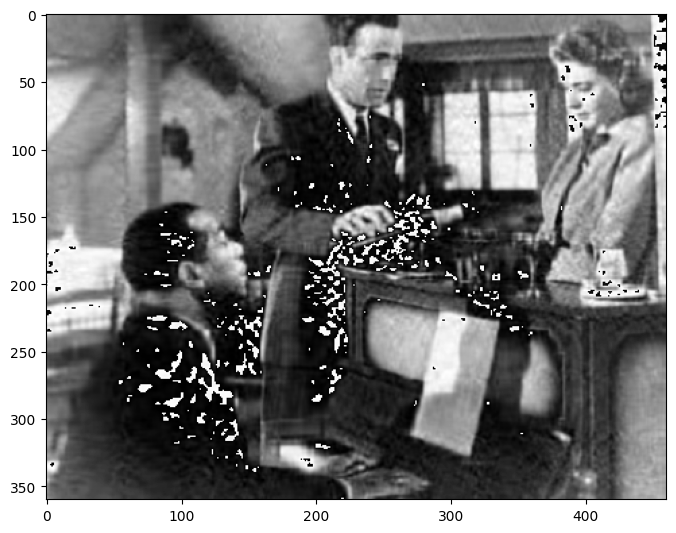

In [ ]:
reconstructed_matrix = pca.inverse_transform(X_transformed)
reconstructed_image_pca = Image.fromarray(np.uint8(reconstructed_matrix))
plt.figure(figsize=(8,12))
plt.imshow(reconstructed_image_pca,cmap = plt.cm.gray)

In [ ]:
def my_rmse(np_arr1,np_arr2):
    dim = np_arr1.shape
    tot_loss = 0
    for i in range(dim[0]):
        for j in range(dim[1]):
            tot_loss += math.pow((np_arr1[i,j] - np_arr2[i,j]),2)
    return round(math.sqrt(tot_loss/(dim[0]* dim[1]*1.0)),2)

In [ ]:
error_pca = my_rmse(image_matrix,reconstructed_matrix)
print(error_pca)

8.57


In [ ]:
# Standarise the Data
X_org = image_matrix.copy()
sc = StandardScaler()
X = sc.fit_transform(X_org)

# this is the size of our encoded representations
encoding_dim = reduced_pixel

# this is our input placeholder
input_img = Input(shape=(original_dimensions[1],))

# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='linear')(input_img)

# "decoded" is the lossy reconstruction of the input
decoded = Dense(original_dimensions[1], activation=None)(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

#Encoder
encoder = Model(input_img, encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]

# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X, X,
                epochs=250,
                batch_size=16,
                shuffle=True)
encoded_imgs = encoder.predict(X)
decoded_imgs = decoder.predict(encoded_imgs)

Epoch 1/250
 1/23 ━━━━━━━━━━━━━━━━━━━━ 27s 1s/step - loss: 1.3986

W0000 00:00:1712194421.689934     108 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 1.0567
Epoch 2/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5406 
Epoch 3/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3298 
Epoch 4/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2511 
Epoch 5/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2200 
Epoch 6/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1864 
Epoch 7/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1677 
Epoch 8/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1522 
Epoch 9/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1324 
Epoch 10/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1257 
Epoch 11/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1132 
Epoch 12/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1066 
Epoch 13/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0965 
Epoch 14/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0904 
Epoch 15/250
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0864 
E

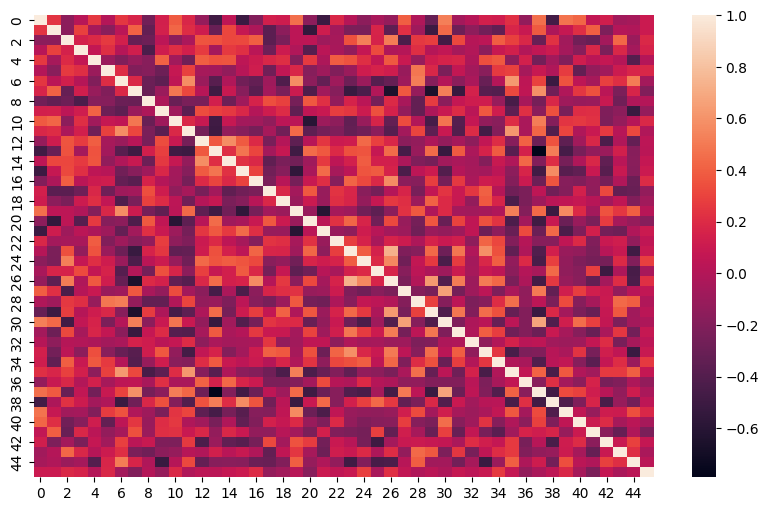

In [ ]:
df_ae = pd.DataFrame(data = encoded_imgs,columns=list(range(encoded_imgs.shape[1])))
figure = plt.figure(figsize=(10,6))
corrMatrix = df_ae.corr()
sns.heatmap(corrMatrix, annot=False)
plt.show()

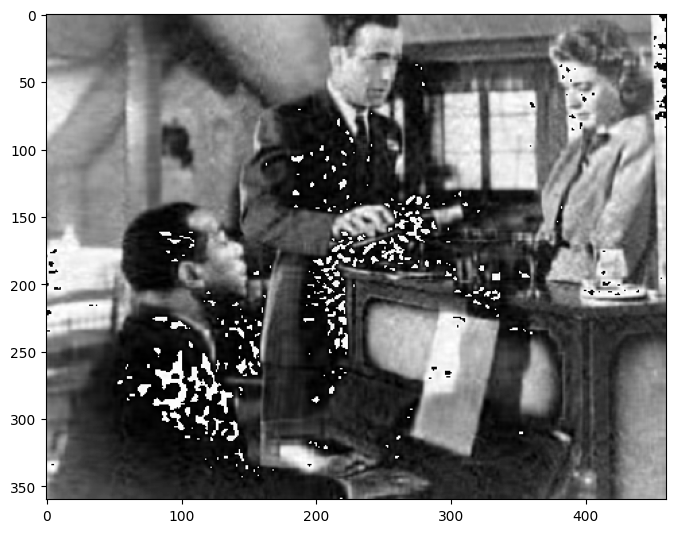

In [ ]:
X_decoded_ae = sc.inverse_transform(decoded_imgs)
reconstructed_image_ae = Image.fromarray(np.uint8(X_decoded_ae))
plt.figure(figsize=(8,12))
plt.imshow(reconstructed_image_ae,cmap = plt.cm.gray)

In [ ]:
error_ae = my_rmse(image_matrix,X_decoded_ae)
print(error_ae)

8.94


In [ ]:
input_img = Input(shape=(original_dimensions[1],))
encoded1 = Dense(128, activation='relu')(input_img)
encoded2 = Dense(reduced_pixel, activation='relu')(encoded1)
decoded1 = Dense(128, activation='relu')(encoded2)
decoded2 = Dense(original_dimensions[1], activation=None)(decoded1)
autoencoder = Model(input_img, decoded2)
autoencoder.compile(optimizer='adam', loss='mean_squared_error')
autoencoder.fit(X,X,
                epochs=100,
                batch_size=16,
                shuffle=True)
# Encoder
encoder = Model(input_img, encoded2)
# Decoder
decoder = Model(input_img, decoded2)
encoded_imgs = encoder.predict(X)
decoded_imgs = decoder.predict(X)

Epoch 1/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - loss: 0.9371
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5030 
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2814 
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2263
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1801
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1484 
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1296 
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1170 
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1040 
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0988 
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0872 
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0833 
Epoch 13/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0771 
Epoch 14/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0766 
Epoch 15/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss:

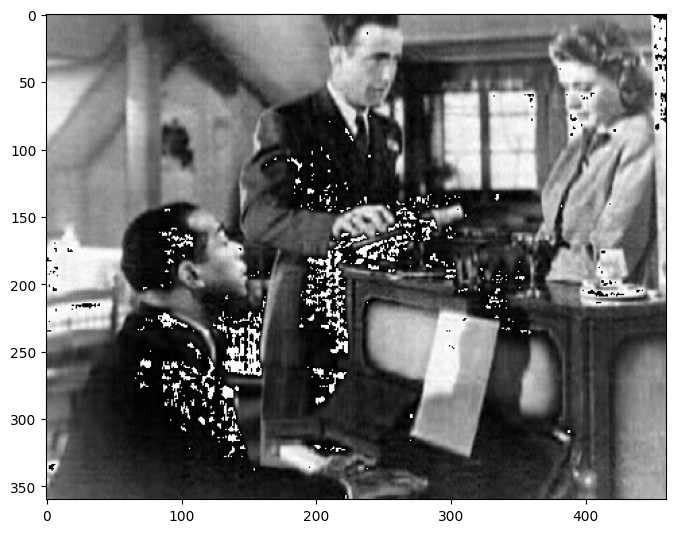

In [ ]:
X_decoded_deep_ae = sc.inverse_transform(decoded_imgs)
reconstructed_image_deep_ae = Image.fromarray(np.uint8(X_decoded_deep_ae))
plt.figure(figsize=(8,12))
plt.imshow(reconstructed_image_deep_ae,cmap = plt.cm.gray)

In [ ]:
error_dae = my_rmse(image_matrix,X_decoded_deep_ae)
print(error_dae)

7.56


---
---